<a href="https://colab.research.google.com/github/laserick/Project_kdd/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [40]:
#Loading the Streamflow data
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
sflow = pd.read_csv('streamflow.csv', parse_dates=['Date'], date_parser = d_parser)
sflow.head()


<ipython-input-40-1529756ffd4f>:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Unnamed: 0,Year,Month,Day,Date,Q (m3/s)
0,11963,1967,1,1,1967-01-01,2690.0
1,11964,1967,1,2,1967-01-02,2650.0
2,11965,1967,1,3,1967-01-03,2650.0
3,11966,1967,1,4,1967-01-04,2610.0
4,11967,1967,1,5,1967-01-05,2570.0


In [41]:
#Data Preprocessing
#Checking for duplication in rows
duplicated_rows = sflow[sflow.duplicated()]
len(duplicated_rows)

0

In [42]:
#Checking for missing values
missing_values = sflow.isna().sum()
print(missing_values)

Unnamed: 0      0
Year            0
Month           0
Day             0
Date            0
Q (m3/s)      588
dtype: int64


In [43]:
import plotly.express as px

fig = px.line(sflow, x = 'Date', y = 'Q (m3/s)', title = "Streamflow")

fig.update_xaxes(
    rangeslider_visible =True,
    rangeselector = dict(
        buttons = list([
            dict(count= 1, label= '1y', step = 'year', stepmode = 'backward'),
            dict(count= 2, label= '2y', step = 'year', stepmode = 'backward'),
            dict(count= 3, label= '3y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

fig.show()
#plt.plot(sflow['Date'], sflow['Q (m3/s)'])
#plt.title("Streamflow with missing values")
#plt.xlabel("Date")
#plt.ylabel("Streamflow rate in m3/s")

In [44]:
#Considering data from the beginning of 1967 to the end of August 2017
end_date = '2017-08-31'
trimmed_sflow = sflow[sflow['Date'] <= end_date]

In [45]:
trimmed_sflow

,Unnamed: 0,Year,Month,Day,Date,Q (m3/s)
0,11963,1967,1,1,1967-01-01,2690.0
1,11964,1967,1,2,1967-01-02,2650.0
2,11965,1967,1,3,1967-01-03,2650.0
3,11966,1967,1,4,1967-01-04,2610.0
4,11967,1967,1,5,1967-01-05,2570.0
...,...,...,...,...,...,...
18501,30464,2017,8,27,2017-08-27,NaN
18502,30465,2017,8,28,2017-08-28,NaN
18503,30466,2017,8,29,2017-08-29,NaN
18504,30467,2017,8,30,2017-08-30,NaN


In [46]:
#Checking for missing values
missing_values = trimmed_sflow.isna().sum()
print(missing_values)

Unnamed: 0      0
Year            0
Month           0
Day             0
Date            0
Q (m3/s)      466
dtype: int64


In [47]:
#imputing missing values using interpolation
trimmed_sflow['Q (m3/s)'].interpolate(method= 'linear', inplace= True)

<ipython-input-47-7cfcc0004453>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
missing_values = trimmed_sflow.isna().sum()
print(missing_values)

Unnamed: 0    0
Year          0
Month         0
Day           0
Date          0
Q (m3/s)      0
dtype: int64


In [49]:
print(trimmed_sflow.tail(n=10))

       Unnamed: 0  Year  Month  Day       Date  Q (m3/s)
18496       30459  2017      8   22 2017-08-22   48009.0
18497       30460  2017      8   23 2017-08-23   47554.0
18498       30461  2017      8   24 2017-08-24   46879.0
18499       30462  2017      8   25 2017-08-25   44911.0
18500       30463  2017      8   26 2017-08-26   42213.0
18501       30464  2017      8   27 2017-08-27   42213.0
18502       30465  2017      8   28 2017-08-28   42213.0
18503       30466  2017      8   29 2017-08-29   42213.0
18504       30467  2017      8   30 2017-08-30   42213.0
18505       30468  2017      8   31 2017-08-31   42213.0


In [50]:
fig = px.line(trimmed_sflow, x = 'Date', y = 'Q (m3/s)', title = "Streamflow")

fig.update_xaxes(
    rangeslider_visible =True,
    rangeselector = dict(
        buttons = list([
            dict(count= 1, label= '1y', step = 'year', stepmode = 'backward'),
            dict(count= 2, label= '2y', step = 'year', stepmode = 'backward'),
            dict(count= 3, label= '3y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

fig.show()

In [51]:
#dropping some variables
trimmed_sflow = trimmed_sflow.drop(columns=['Month', 'Year', 'Day', 'Unnamed: 0'])
sflow_prophet =trimmed_sflow.copy()

In [14]:
trimmed_sflow.set_index('Date', inplace= True)
trimmed_sflow

,Q (m3/s)
Date,
1967-01-01,2690.0
1967-01-02,2650.0
1967-01-03,2650.0
1967-01-04,2610.0
1967-01-05,2570.0
...,...
2017-08-27,42213.0
2017-08-28,42213.0
2017-08-29,42213.0


In [15]:
trimmed_sflow = trimmed_sflow.resample('M').mean()
trimmed_sflow.head()

,Q (m3/s)
Date,
1967-01-31,2309.354839
1967-02-28,1950.714286
1967-03-31,1550.967742
1967-04-30,1527.666667
1967-05-31,1615.161290


In [16]:
fig = px.line(trimmed_sflow,y = 'Q (m3/s)', title = "Streamflow")

fig.update_xaxes(
    rangeslider_visible =True,
    rangeselector = dict(
        buttons = list([
            dict(count= 1, label= '1y', step = 'year', stepmode = 'backward'),
            dict(count= 2, label= '2y', step = 'year', stepmode = 'backward'),
            dict(count= 3, label= '3y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

fig.show()

In [17]:
# Splitting data
cutoff_date = '2015-01-01'  # Define a cutoff date for splitting the data into training and test sets

# Split the data into training and test sets
train_data = trimmed_sflow[:cutoff_date]
test_data = trimmed_sflow[cutoff_date:]

In [18]:
#Using the train to confirm stationarity to ensure accurate modelling and forecasting
from statsmodels.tsa.stattools import adfuller

# Assuming 'streamflow_data' contains your streamflow data
result = adfuller(train_data['Q (m3/s)'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -5.088381997385275
p-value: 1.4793030147009286e-05
Critical Values:
1%: -3.442039359113542
5%: -2.8666965134862514
10%: -2.5695162601790758


p-value < 0.05 hence confirms stationarity

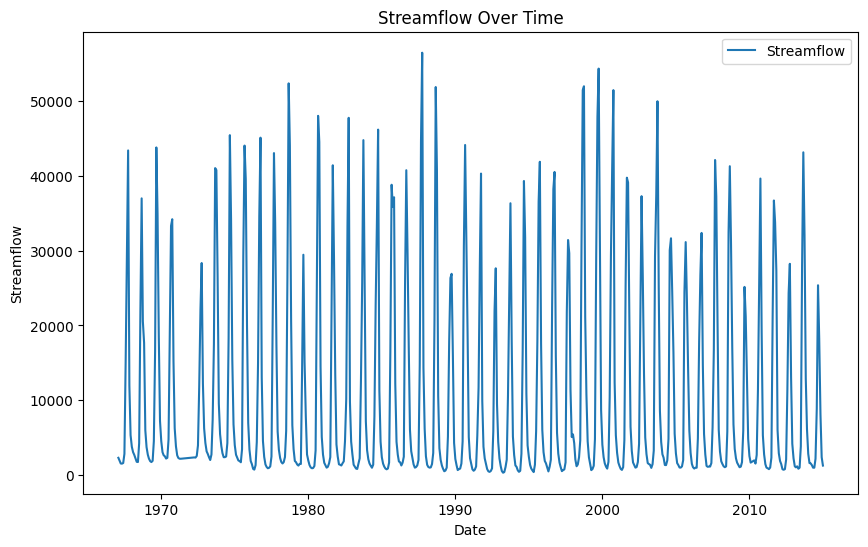

In [19]:
# Plot the streamflow data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Q (m3/s)'], label='Streamflow')
plt.title('Streamflow Over Time')
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.legend()
plt.show()

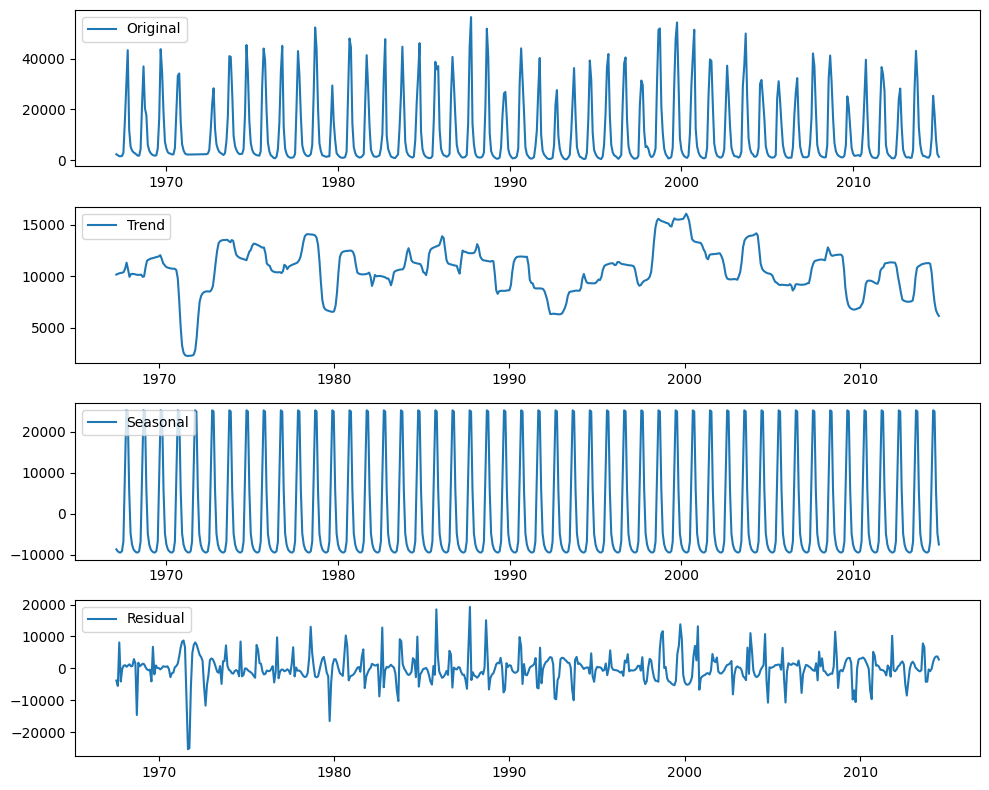

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(train_data['Q (m3/s)'], model='additive', period=12)  # Change period as per your seasonal frequency

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(train_data['Q (m3/s)'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


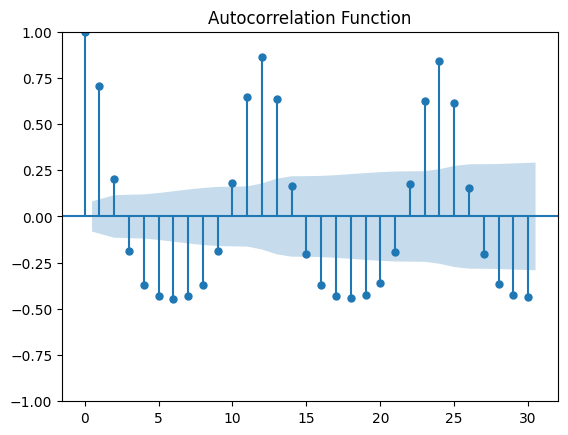

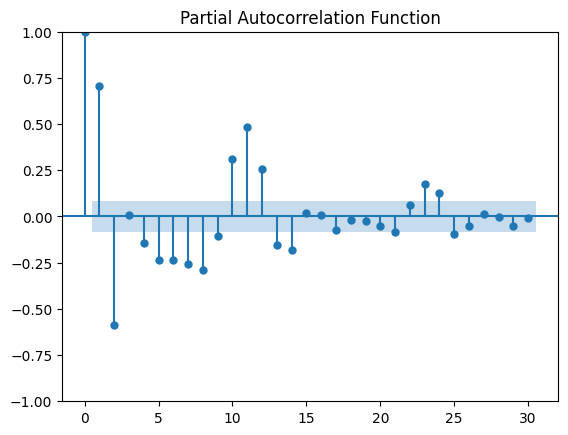

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(train_data, lags=30)
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(train_data, lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()

In [22]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00


In [23]:
from pmdarima import auto_arima

# Assuming 'train_data' contains the streamflow data for training
# 'start_p', 'd', 'start_q' specify the range of values for p, d, and q
# 'start_P', 'D', 'start_Q', 'm' specify the range of values for seasonal P, D, Q, and m
model = auto_arima(train_data['Q (m3/s)'], seasonal=True,
                   trace=True, error_action='ignore', suppress_warnings=True, m= 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=11688.790, Time=8.93 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12596.914, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=11645.042, Time=5.82 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12058.698, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12868.637, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=12203.932, Time=0.16 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=11542.939, Time=20.53 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=11841.211, Time=4.21 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=11569.255, Time=6.17 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=12335.748, Time=2.33 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=11770.943, Time=4.51 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=11548.281, Time=17.11 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=11695.960, Time=13.95 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=17.07 sec
 ARIMA(

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  576
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -5766.470
Date:                            Mon, 20 Nov 2023   AIC                          11542.939
Time:                                    22:35:40   BIC                          11564.720
Sample:                                01-31-1967   HQIC                         11551.434
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1719.1643    297.398      5.781      0.000    1136.276    2302.053
ar.L1          0.4678      0.021     22.455      0.000       0.427       0.509
ar.S.L12       0.4293      0.022     19.897      0.000       0.387       0.472
ar.S.L24       0.4017      0.023     17.483      0.000       0.357       0.447
sigma2      2.663e+07      0.027   9.93e+08      0.000    2.66e+07    2.66e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.70   Jarque-Bera (JB):               680.76
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.85
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+25. Standard errors may be unstable.
"""

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data['Q (m3/s)'] is your streamflow data column
model = ARIMA(train_data['Q (m3/s)'], order=(1, 0, 0), seasonal_order=(2,0,0,12) )  # Define the ARIMA model with appropriate order
arima_results = model.fit()
print(arima_results.summary())

                                    SARIMAX Results                                     
Dep. Variable:                         Q (m3/s)   No. Observations:                  576
Model:             ARIMA(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -5752.350
Date:                          Mon, 20 Nov 2023   AIC                          11514.701
Time:                                  22:35:55   BIC                          11536.481
Sample:                              01-31-1967   HQIC                         11523.195
                                   - 12-31-2014                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.055e+04   4204.800      2.509      0.012    2306.922    1.88e+04
ar.L1          0.4975      0.021     23.508      0.

In [26]:
start = len(train_data)
end = len(train_data) + len(test_data)-1
pred = arima_results.predict(start= start, end= end, typ ='levels' )
print(pred)

2015-01-31     1318.906929
2015-02-28     1779.651863
2015-03-31     2000.281796
2015-04-30     1834.196412
2015-05-31     1962.635883
2015-06-30     3785.518373
2015-07-31    17373.571439
2015-08-31    31542.359882
2015-09-30    23435.882157
2015-10-31    10474.954333
2015-11-30     4919.667318
2015-12-31     2967.211804
2016-01-31     2446.346027
2016-02-29     2640.739955
2016-03-31     2636.864093
2016-04-30     2410.804084
2016-05-31     2467.341909
2016-06-30     3817.233904
2016-07-31    12900.472173
2016-08-31    26557.347827
2016-09-30    19737.795936
2016-10-31     9454.669547
2016-11-30     4420.305783
2016-12-31     3046.025124
2017-01-31     2831.711355
2017-02-28     3121.773009
2017-03-31     3216.746217
2017-04-30     3041.524942
2017-05-31     3123.447405
2017-06-30     4534.143752
2017-07-31    14606.175261
2017-08-31    27004.684631
Freq: M, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



<Axes: xlabel='Date'>

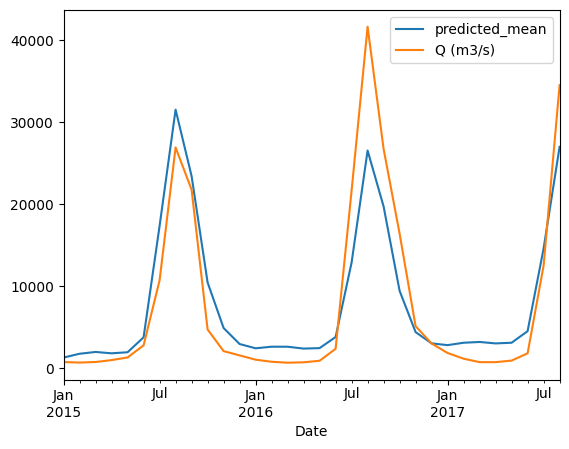

In [27]:
pred.plot(legend= True)
test_data['Q (m3/s)'].plot(legend= True)

In [28]:
# Evaluate the model's performance
rmse = np.sqrt(((pred - test_data['Q (m3/s)']) ** 2).mean())
print("RMSE:", rmse)

RMSE: 4415.127564809145


In [29]:
start = '2017-09-01'
end = '2017-12-31'
pred = arima_results.predict(start= start, end= end, typ ='levels' )
print(pred)

2017-09-30    20361.351618
2017-10-31    10020.712733
2017-11-30     5304.572654
2017-12-31     3826.020537
Freq: M, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [33]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [53]:
####### Using Facebook Prophet Model
sflow_pro = sflow_prophet.rename(columns={'Date': 'ds', 'Q (m3/s)': 'y'})
sflow_pro

,ds,y
0,1967-01-01,2690.0
1,1967-01-02,2650.0
2,1967-01-03,2650.0
3,1967-01-04,2610.0
4,1967-01-05,2570.0
...,...,...
18501,2017-08-27,42213.0
18502,2017-08-28,42213.0
18503,2017-08-29,42213.0
18504,2017-08-30,42213.0


In [82]:
sflow_pro = sflow_pro.resample('M', on='ds').mean().reset_index()
sflow_pro

,ds,y
0,1967-01-31,2309.354839
1,1967-02-28,1950.714286
2,1967-03-31,1550.967742
3,1967-04-30,1527.666667
4,1967-05-31,1615.161290
...,...,...
603,2017-04-30,756.833333
604,2017-05-31,947.096774
605,2017-06-30,1832.066667
606,2017-07-31,12521.032258


In [83]:
# Split the data into train and test sets
train_data_pro = sflow_pro[sflow_pro['ds'] <= cutoff_date]
test_data_pro = sflow_pro[sflow_pro['ds'] > cutoff_date]
train_data_pro

,ds,y
0,1967-01-31,2309.354839
1,1967-02-28,1950.714286
2,1967-03-31,1550.967742
3,1967-04-30,1527.666667
4,1967-05-31,1615.161290
...,...,...
571,2014-08-31,25371.225806
572,2014-09-30,18192.533333
573,2014-10-31,8129.645161
574,2014-11-30,2386.766667


In [84]:
# Create and fit a Prophet model using the training data
model = Prophet()
model = model.fit(train_data_pro)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugva97jy/mtw4s4j4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugva97jy/kkjro14o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83332', 'data', 'file=/tmp/tmpugva97jy/mtw4s4j4.json', 'init=/tmp/tmpugva97jy/kkjro14o.json', 'output', 'file=/tmp/tmpugva97jy/prophet_model2627oana/prophet_model-20231121000522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:05:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [86]:
# Create a DataFrame with future dates (for test period)
future_dates = model.make_future_dataframe(periods=len(test_data_pro), freq='M')  # Fo

In [91]:
future_dates = future_dates[len(train_data_pro): len(sflow_pro)+1]

In [92]:
forecast = model.predict(future_dates)
len(forecast)

32

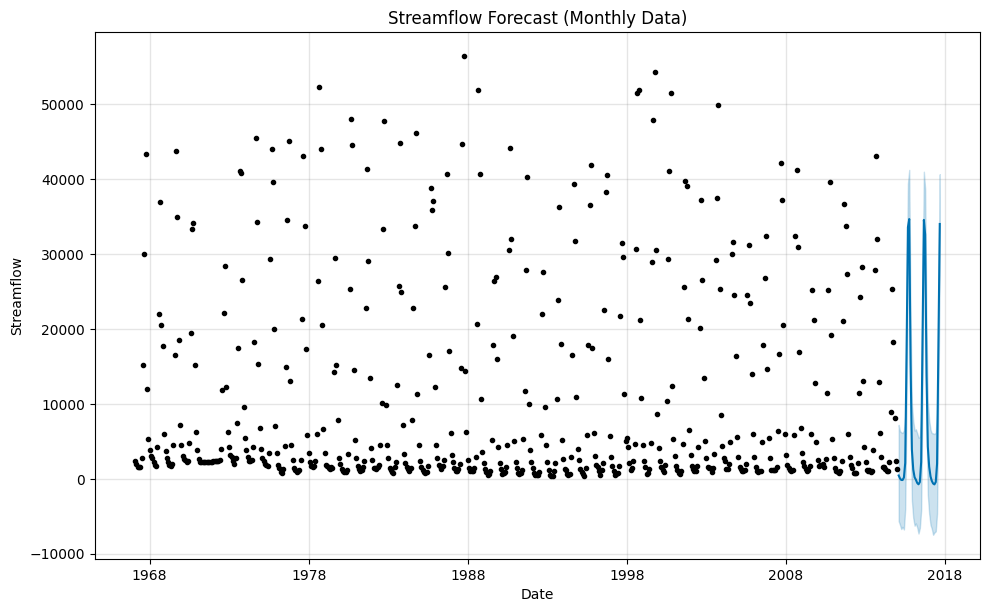

In [93]:
# Visualize the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title('Streamflow Forecast (Monthly Data)')
plt.show()

In [94]:
# Calculate RMSE for the test data
rmse_pro = np.sqrt(mean_squared_error(test_data_pro['y'], forecast['yhat']))
print(f'Root Mean Squared Error (RMSE): {rmse_pro}')



Root Mean Squared Error (RMSE): 4023.026115736536


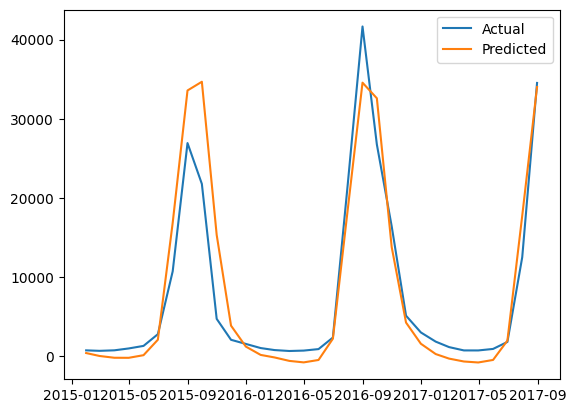

In [106]:
from matplotlib import pyplot
y_true = test_data_pro['y'][-len(test_data_pro):].values
y_pred = forecast['yhat'].values
pyplot.plot(test_data_pro['ds'],y_true, label='Actual')
pyplot.plot(forecast['ds'],y_pred, label='Predicted')
pyplot.legend()
pyplot.show()